### load the data

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf

In [107]:
cf.go_offline()

In [108]:
data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)

In [109]:
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [111]:
data.isnull().sum()

Duration (in seconds)        0
Q2                           0
Q3                           0
Q4                           0
Q5                           0
                         ...  
Q44_8                    16231
Q44_9                    20193
Q44_10                   22271
Q44_11                   22729
Q44_12                   23162
Length: 296, dtype: int64

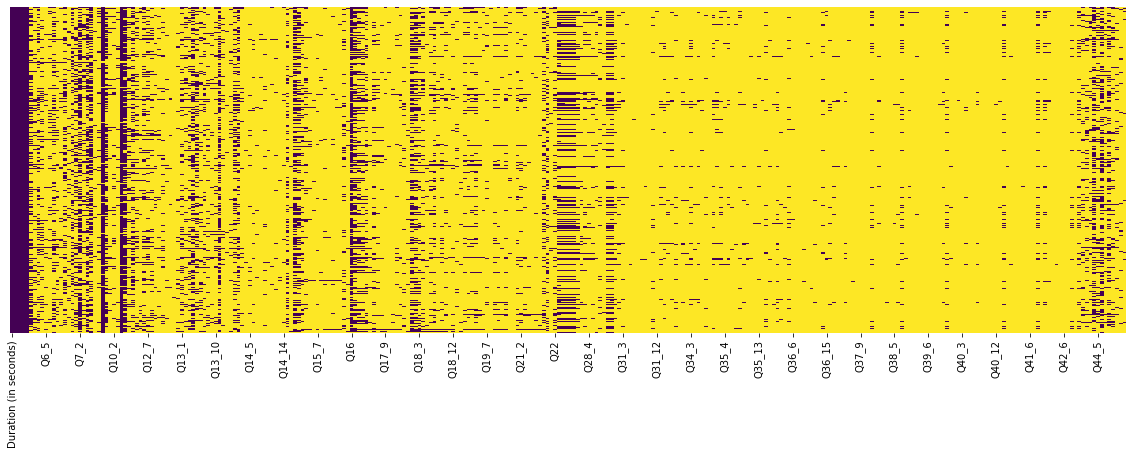

In [112]:
sns.heatmap(data.isnull(), yticklabels=[], cbar=False, cmap='viridis')
fig = plt.gcf()
fig.set_size_inches(20,6)

### Data EDA

### age distribution

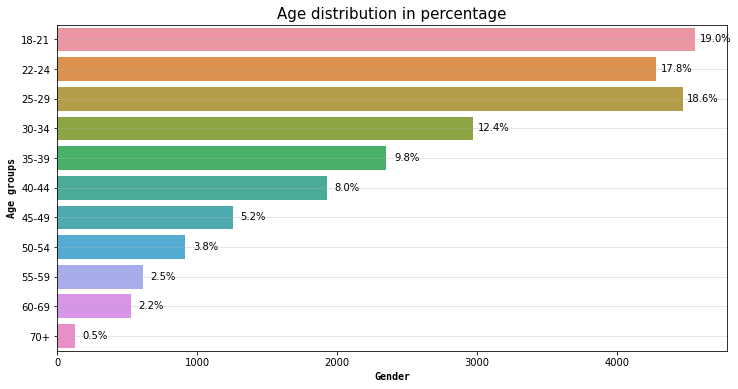

In [208]:
sns.countplot(y=data['Q2'][1:].sort_values())
ax = plt.gca()
ax.grid(axis='y', linestyle='-', alpha=0.4)    
for p in ax.patches:
    percentage = f'{100 * p.get_width() / float(len(data)):.1f}%\n'
    ax.annotate(percentage, ( p.get_width()+145,p.get_y() + p.get_height()/1.4), ha='center', va='center')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('Age distribution in percentage',size=15)
plt.xlabel('Gender',fontname = 'monospace', weight='semibold')
plt.ylabel('Age groups',fontname = 'monospace', weight='semibold');

In [174]:
fig = px.pie(data['Q2'][1:].value_counts().reset_index(), values='Q2', names='index', title='Age distribution', labels={'Q2':'count', 'index':'age group'})
fig.update_traces(textinfo='label+ percent')
fig.show()

In [277]:
fig = px.bar(data['Q2'][1:].value_counts(), text='value', color_discrete_sequence=['darkgrey'],labels={'value':'count', 'index':'age range'}, title='Age distribution')
fig.show()

### Gender

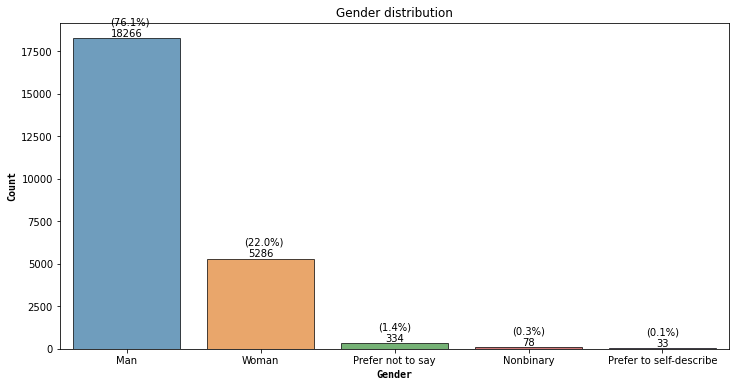

In [359]:
sns.barplot(x=data['Q3'][1:].value_counts().reset_index()['index'], y=data['Q3'][1:].value_counts().reset_index()['Q3'], edgecolor='black', alpha=0.7)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
for p in ax.patches:
    pct = f'({100*p.get_height()/float(len(data)):0.1f}%)\n'
    ax.annotate(pct, (p.get_x()+p.get_width()/2.9, p.get_y()+p.get_height()+120))
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.xlabel('Gender',fontname = 'monospace', weight='semibold')
plt.ylabel('Count',fontname = 'monospace', weight='semibold')
plt.title('Gender distribution');

In [358]:
fig = px.pie(data['Q3'][1:].value_counts().reset_index(), values='Q3', names='index', labels={'index':'Gender', 'Q3':'Count'}
            ,title='Gender distribution')
fig.update_traces(textinfo='label+percent') # mostly men 

In [371]:
fig = px.sunburst(data_frame =data, path=['Q3', 'Q2'], title='Gender and Age', labels={'labels':'Age', 'parent':'Gender'})
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))

### Country

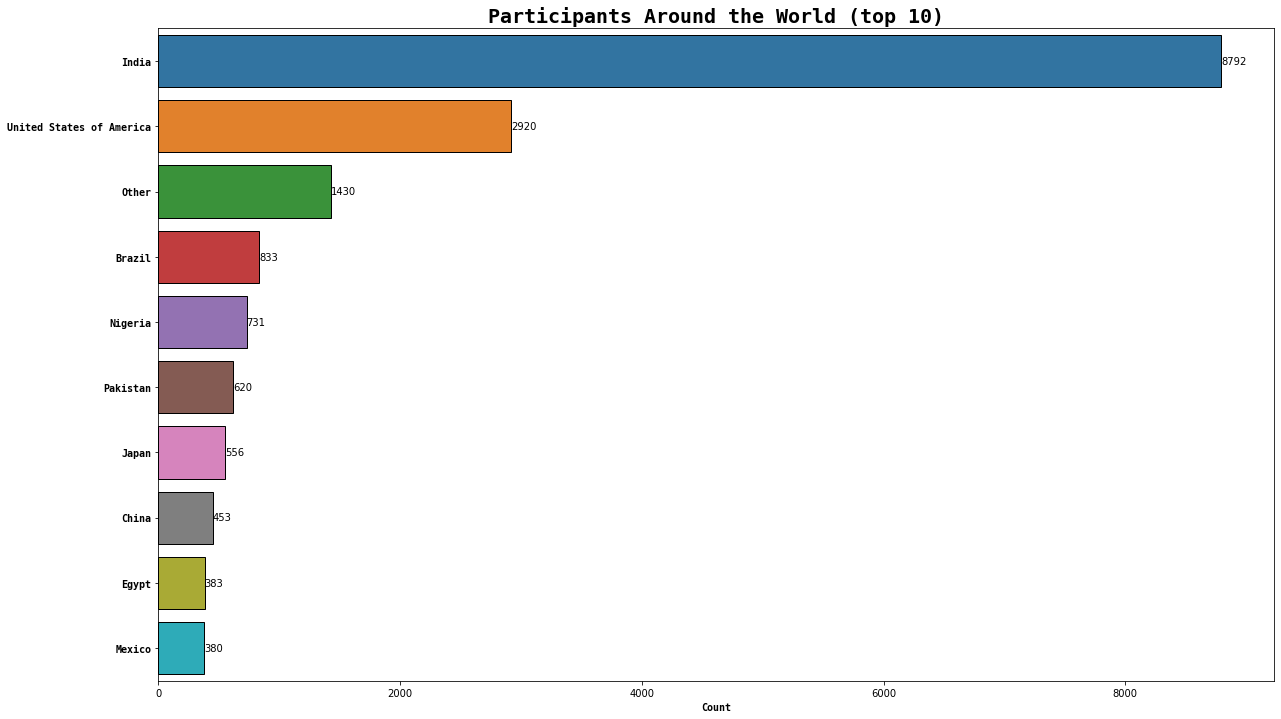

In [373]:
sns.barplot(y = data['Q4'][1:].value_counts().reset_index()[:10]['index'], x = data['Q4'][1:].value_counts().reset_index()[:10]['Q4'], edgecolor='black')
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.title('Participants Around the World (top 10)', fontname = 'monospace', weight='semibold', size=20)
for i in ax.get_yticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
plt.xlabel('Count',fontname = 'monospace', weight='semibold')
plt.ylabel('');

In [356]:
fig = px.pie(data['Q4'][1:].value_counts().reset_index()[:10], values='Q4', names='index', title='Participants Around the World')
fig.update_traces(textinfo='label+percent')

In [348]:
px.choropleth(data_frame =data['Q4'][1:].value_counts().reset_index(), locations='index', locationmode='country names',color='Q4'
             ,color_continuous_scale='peach', labels={'index':'Country', 'Q4':'Count'}, title='Participants Around the World')